In [1]:
!pip install pandas numpy matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Notebook is working!")


Notebook is working!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
df = pd.read_csv("coffee sales.csv")

In [9]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df['card'].fillna('CashUser', inplace=True)
df['month'] = df['date'].dt.strftime('%Y-%m')
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df.head()


,date,datetime,cash_type,card,money,coffee_name,month,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,Friday,13


# ☕ Coffee Sales Analysis
### 📊 Uncovering customer trends and product performance from vending machine sales

**Objective:**  
Analyze coffee sales data to identify product popularity, peak sales periods, and customer preferences.  
This will help optimize inventory planning, restocking, and machine placement decisions.


### Popular Coffee Products

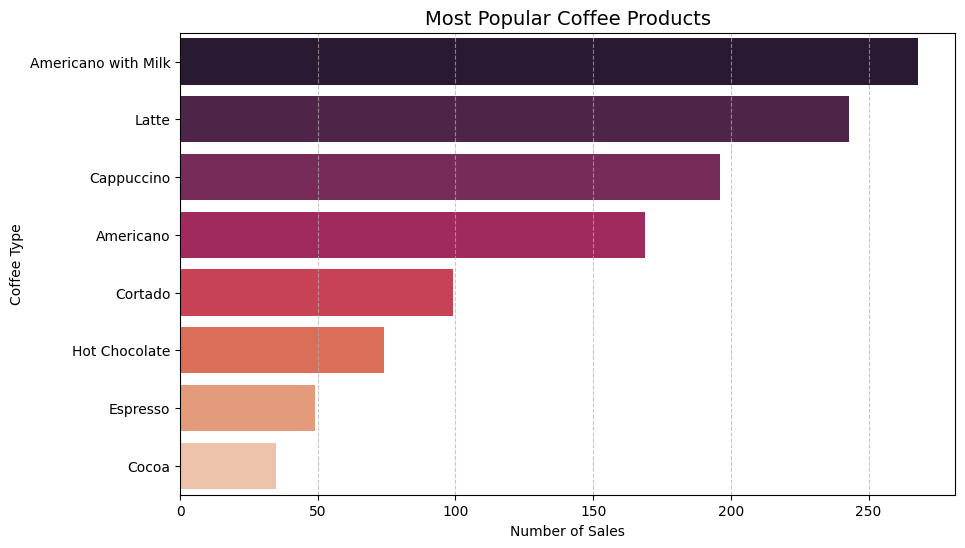

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette='rocket')
plt.title('Most Popular Coffee Products', fontsize=14)
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Revenue by Product

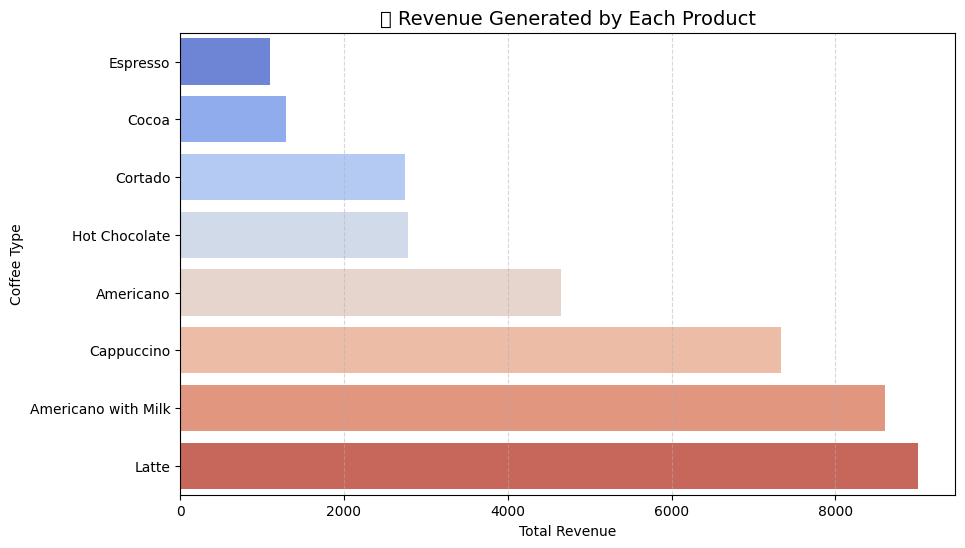

In [12]:
revenue = df.groupby('coffee_name')['money'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=revenue.values, y=revenue.index, palette='coolwarm')
plt.title('💰 Revenue Generated by Each Product', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Coffee Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


### Sales by Hour of Day

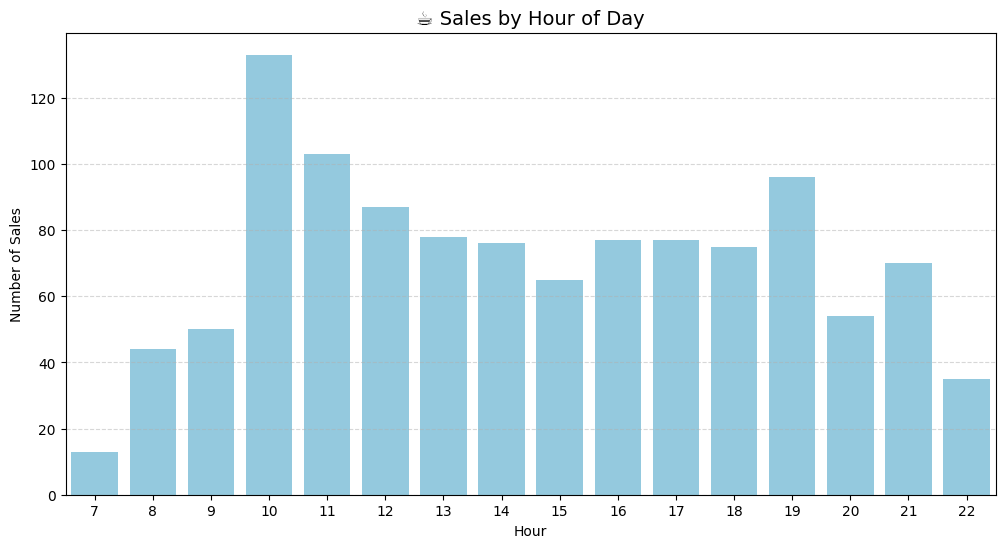

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, color='skyblue')
plt.title('☕ Sales by Hour of Day', fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Sales by Weekday

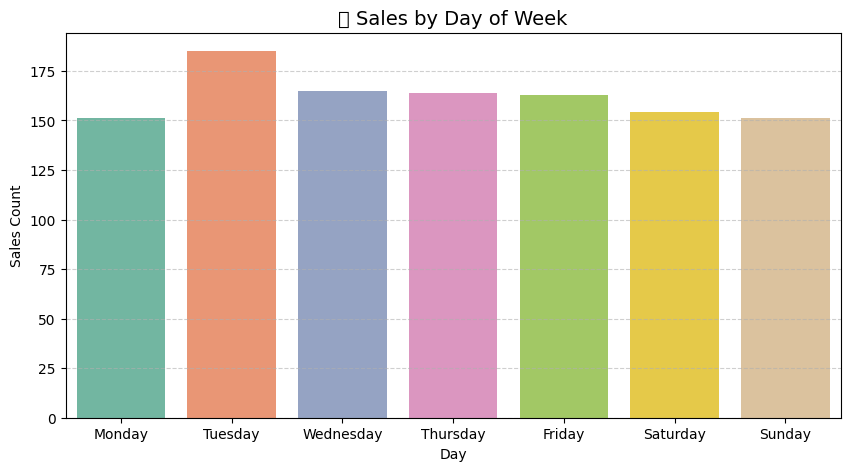

In [15]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.countplot(x='weekday', data=df, order=order, palette='Set2')
plt.title('📆 Sales by Day of Week', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Sales Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Monthly Sales Trend

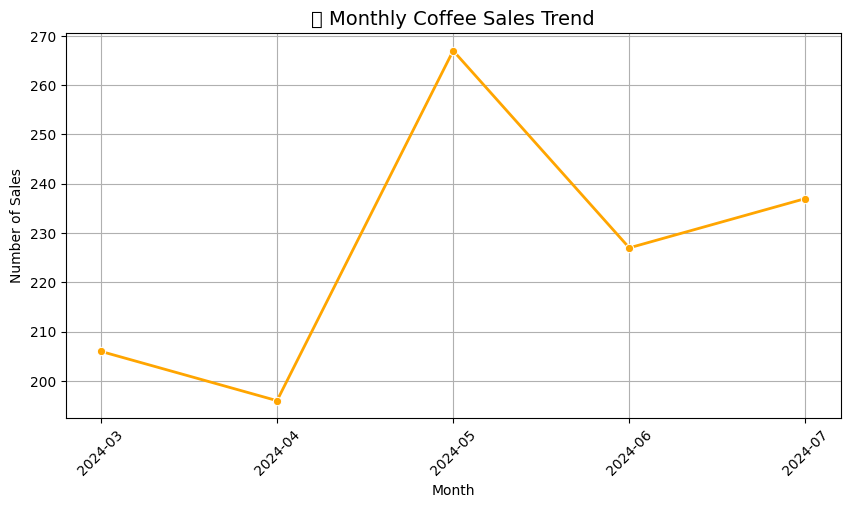

In [16]:
monthly = df.groupby('month').size()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, marker='o', linewidth=2, color='orange')
plt.title('📈 Monthly Coffee Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 📌 Key Insights

- ☕ **Americano with Milk** and **Latte** are the top-selling products.
- ⏰ **Peak hours** for coffee purchases are around **10 AM** and **7 PM**.
- 📆 **Tuesday** sees the highest number of sales.
- 💰 **Latte** brings in the highest total revenue.
- 🗓️ Sales are generally increasing month-over-month, suggesting growing demand.

These insights help inform stocking schedules, product placements, and marketing strategies.


# 🧠 ML Model

In [18]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.7 MB 13.7 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 12.9 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 12.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.4 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.4 MB 9.8 MB/s eta 0:00:04
   ------ --------------------------------- 6.0/38.4 MB 10.0 MB/s eta 0:00:04
   --------- ------------------------------ 8.7/38.4 MB 10.3 MB/s eta 0:00:03
   ----------- ---------------------------- 11.0/38.4 MB 10.7 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.4 MB 11.0 MB/s eta 0:00:03
   ---------------- ----------------------- 16.3/38.4 MB 11.2 MB/s eta 0:00:02
   --

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Features & target
X = df[['coffee_name', 'cash_type', 'hour', 'weekday']]
y = df['money']

# Step 2: One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

print("🔍 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))


🔍 Mean Squared Error: 3.385468190992795
📈 R² Score: 0.8181466317753257


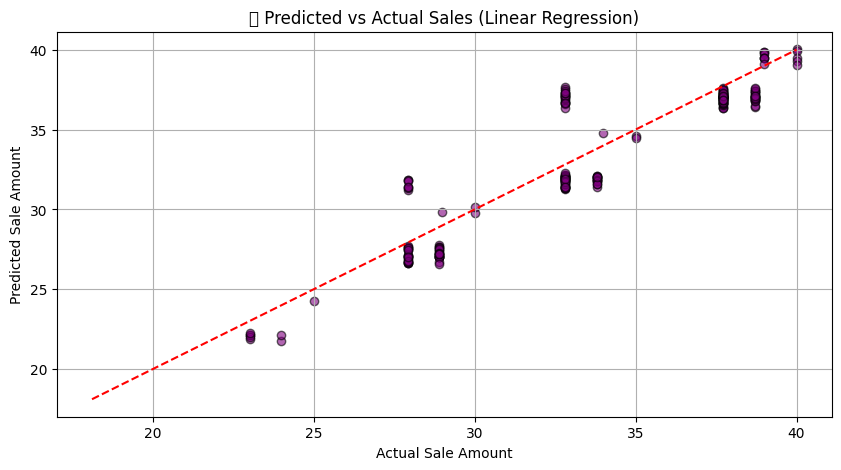

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolors='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount")
plt.title("🔮 Predicted vs Actual Sales (Linear Regression)")
plt.grid(True)
plt.show()
